# RandomForest Classifier Modelling

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

### Read the CSV and Perform Basic Data Cleaning

In [2]:
# Import depedencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import os

In [3]:
# Load libraries
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import VarianceThreshold,SelectFromModel,RFECV

In [91]:
# File path 
data_file = os.path.join("","Resources","data","exoplanet_data.csv")
model_result = os.path.join("","Resources","results","RandomForest.csv")
model_file_name = os.path.join("","Resources","model",'randomForest_finalized_model.pickle')

In [5]:
# Read data
df = pd.read_csv(data_file)

In [6]:
# Display Sample data
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [7]:
# Check data size
df.shape

(6991, 41)

In [8]:
# Check datafrme for summary and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [9]:
# Check null values
df.isna().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [10]:
# Check dependent variable unique value
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [11]:
# Use label encoding for depdendent variable
number = LabelEncoder()
df['koi_disposition']= number.fit_transform(df['koi_disposition'])

In [12]:
# Display results
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,1,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,1,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [13]:
#Statistical summary :df descriptions
print(df.describe())

       koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
count      6991.000000    6991.000000    6991.000000    6991.000000   
mean          1.259906       0.157059       0.244743       0.202975   
std           0.821628       0.363882       0.429966       0.402243   
min           0.000000       0.000000       0.000000       0.000000   
25%           1.000000       0.000000       0.000000       0.000000   
50%           2.000000       0.000000       0.000000       0.000000   
75%           2.000000       0.000000       0.000000       0.000000   
max           2.000000       1.000000       1.000000       1.000000   

       koi_fpflag_ec   koi_period  koi_period_err1  koi_period_err2  \
count    6991.000000  6991.000000     6.991000e+03     6.991000e+03   
mean        0.125018    56.191248     1.851122e-03    -1.851122e-03   
std         0.330763   117.570962     7.184503e-03     7.184503e-03   
min         0.000000     0.259820     1.100000e-08    -1.568000e-01   
25%  

In [14]:
# koi_disposition distribution
print(df.groupby('koi_disposition').size())

koi_disposition
0    1687
1    1800
2    3504
dtype: int64


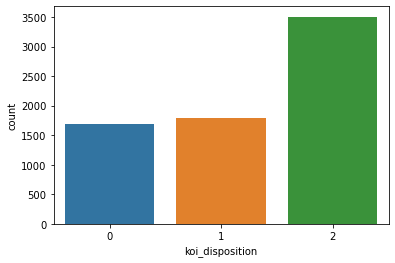

In [15]:
# Data distribution
sns.countplot(x="koi_disposition",data=df)
plt.show()

In [16]:
#Notice that data size for the classes is not uniform 

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

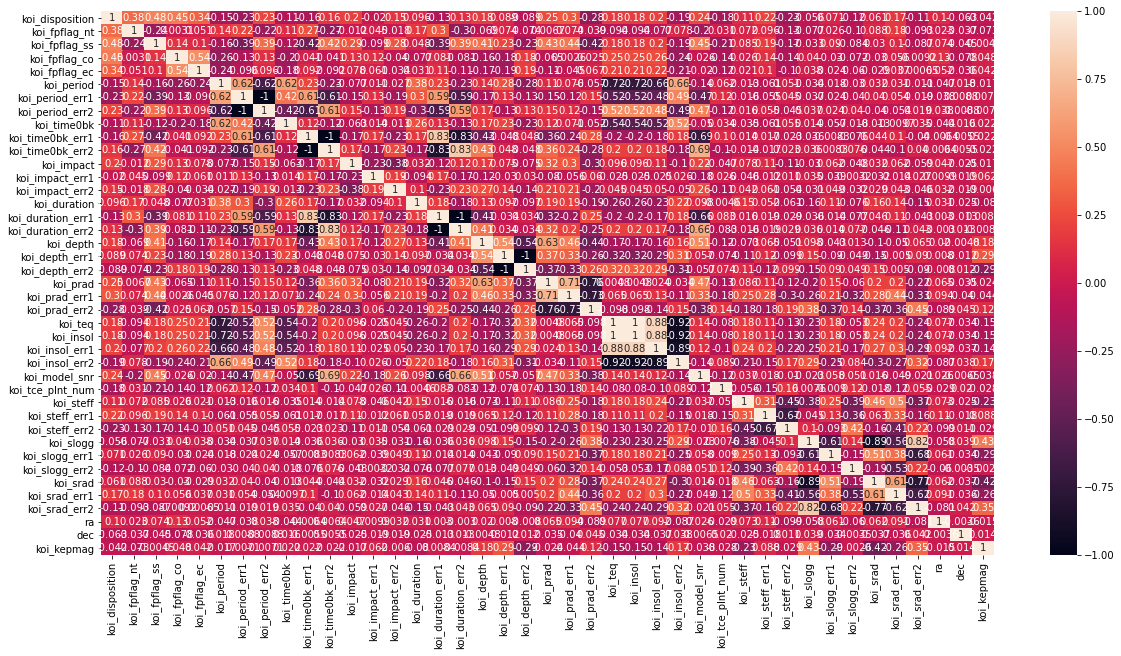

In [17]:
# Chart heatmap to see highly corrlated features -get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
df.columns

In [18]:
# Let's seperate dependent and independent variables
X= df.drop(columns = ['koi_disposition'])
y = df['koi_disposition']

In [19]:
# Get feature list
feature_name = X.columns.tolist()

In [20]:
# Shape of independent variable or features
X.shape

(6991, 40)

In [21]:
# Split data to train and test and check size of train data.
# Using 70-/30 split with random state as 420 (hyper parameter)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=140, test_size=0.30)

# Print shape of train data
print(X_train.shape)

(4893, 40)


In [22]:
# Scale data

In [23]:
# Get scaler reference
scaler = MinMaxScaler()

In [24]:
# Fit independent variablea or features
scaler.fit(X_train)

MinMaxScaler()

In [25]:
# Transfor features
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Check the shape of features
X_train.shape

(4893, 40)

### Build the Model

In [27]:
# Model instance
model_base = RandomForestClassifier(n_estimators=200)

# Fit model
model_base.fit(X_train, y_train)

# Predict
pred_base= model_base.predict(X_test)

In [28]:
# Scores and accurancy
model_base_score = round(model_base.score(X_train, y_train)*100,3)
model_base_accuracy = round(model_base.score(X_test, y_test)*100,3)

In [29]:
# Print matrix results
print("Accuracy score %s" %accuracy_score(y_test,pred_base))
print(confusion_matrix(y_test, pred_base))
print("Classification report  \n %s" %(classification_report(y_test, pred_base)))

Accuracy score 0.8970448045757865
[[ 402   97   14]
 [  86  435   14]
 [   3    2 1045]]
Classification report  
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       513
           1       0.81      0.81      0.81       535
           2       0.97      1.00      0.98      1050

    accuracy                           0.90      2098
   macro avg       0.87      0.86      0.87      2098
weighted avg       0.90      0.90      0.90      2098



In [30]:
print(f"Training Data Score: {model_base_score} %")
print(f"Testing Data Score: {model_base_accuracy} %")

Training Data Score: 100.0 %
Testing Data Score: 89.704 %


In [ ]:
# Base model train and test scores are significantly different. Model need feature selection and possible tuning

# Select Features 

In [31]:
# Before applying feature selection method, we need to split the data first. 
# Reason - select features based on the information from the training set, not on the whole data set. 
# Hold out part of the whole data set as a test set to evaluate the performance of the feature selection and the model.
# Thus the information from the test set cannot be seen while we conduct feature selection and train the model.

In [32]:
# Apply the feature selection based on X_train and y_train.

### Method I. Removing features with low variance

In [33]:
# VarianceThreshold is a simple baseline approach to feature selection. 
# It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features.
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)

print(X_train_remove_variance.shape)

(4893, 40)


In [34]:
# The data still has 32 features, none of the features was removed.

### II. Univariate feature selection

In [35]:
# Univariate feature selection works by selecting the best features based on univariate statistical tests. 
# We compare each feature to the target variable, to see whether there is any statistically significant relationship between them. 
# It is also called analysis of variance (ANOVA). 
# When we analyze the relationship between one feature and the target variable, we ignore the other features. 
# That is why it is called ‘univariate’. Each feature has its test score.
# Finally, all the test scores are compared, and the features with top scores will be selected.

#### 1. Chi-square test

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

sel_chi2 = SelectKBest(chi2, k=4)    # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
chi_support = sel_chi2.get_support()

print(sel_chi2.get_support())

[ True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


#### 2.  f test- statistics or  one-way ANOVA :

In [37]:
from sklearn.feature_selection import f_classif

sel_f = SelectKBest(f_classif, k=4)
X_train_f = sel_f.fit_transform(X_train, y_train)
fTest_support= sel_f.get_support()

print(fTest_support)

[ True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False]


#### 3.  Mutual_info_classif test

In [38]:
from sklearn.feature_selection import mutual_info_classif

sel_mutual = SelectKBest(mutual_info_classif, k=4)
X_train_mutual = sel_mutual.fit_transform(X_train, y_train)
mutualClassifier_support = sel_mutual.get_support()

print(mutualClassifier_support)

[False  True  True False False False False False False False False False
 False False False False False False False  True False False False False
 False False  True False False False False False False False False False
 False False False False]


#### 3.  GenericUnivariateSelect method 

In [39]:
from sklearn.feature_selection import GenericUnivariateSelect

trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=40)
genericUnivariate = trans.fit_transform(X_train, y_train)
genericUnivariate_support = trans.get_support()

print(genericUnivariate_support)

[ True  True  True False  True  True False False  True  True False False
 False False  True  True  True False False  True  True  True False False
 False False  True False False  True  True False False False False False
 False False False False]


### III. Recursive feature elimination

In [40]:
# Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), 
# recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.
# First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. 
# Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

#### 1. Logistic regression as the model

In [41]:
from sklearn.feature_selection import RFE

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=4, step=1)
X_train_rfe_logistic = sel_rfe_logistic.fit_transform(X_train, y_train)
RFE_support= sel_rfe_logistic.get_support()

print(RFE_support)

[ True False  True False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [42]:
# The features which were selected are rank 1. The result shows that the recursive feature elimination selects only part of the original features and one noise feature. 
# This is not an ideal result we want. Let’s try another model

#### 2. Random forest as the model

In [43]:
from sklearn.ensemble import RandomForestClassifier

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=4, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
rfcRFE_support= sel_rfe_tree.get_support()

print(rfcRFE_support)

[False False  True False False False False False False False False False
 False False False  True False False False  True False False False False
 False False  True False False False False False False False False False
 False False False False]


### IV. Feature selection using SelectFromModel

In [44]:
# SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute after fitting. 
# The features are considered unimportant and removed if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter.

#### 1. L1-based feature selection

In [45]:
# linear model with L1 penalty can eliminate some of the features, thus can act as a feature selection method before using another model to fit the data.

In [46]:
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000, penalty='l1')
sel_model_logistic = SelectFromModel(estimator=model_logistic)
X_train_sfm_l1 = sel_model_logistic.fit_transform(X_train, y_train)
lr_support = sel_model_logistic.get_support()

print(lr_support)

[ True  True  True  True  True False False False  True False False  True
 False  True  True  True  True False False False False False  True False
 False False  True  True  True  True  True  True False  True False False
 False  True  True  True]


#### 2. Tree-based feature selection

In [47]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  

# since we already fit the data, we specify prefit option here
# Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
rf_support = sel_model_tree.get_support()

print(rf_support)

[ True  True  True  True False False False False False  True False False
 False False  True  True False False False  True  True  True False False
 False False  True False False  True False False False False False False
 False False False False]


In [48]:
# It selects the correct original features

### V. Feature selection using Support Vector Classifiers (SVC) 

In [49]:
from sklearn.svm import LinearSVC

# Being classification problem, we will be using linear  
lsvc = LinearSVC(tol=0.0001, C=1.0, multi_class='ovr', penalty="l2", loss='squared_hinge',dual=True).fit(X_train,y_train)
model = SelectFromModel(lsvc, prefit=True)
linearSVC_support = model.get_support()

print(linearSVC_support)

[ True  True  True  True  True False False False  True  True False False
 False  True  True  True  True False False False False  True  True False
 False False False False False  True False False False False False False
 False False False False]


### Compare the feature selection methods

In [50]:
# Put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name,
                                     'Chi-2':chi_support,
                                     'f Test': fTest_support,
                                     'Mutual Classifier': mutualClassifier_support,
                                     'Generic Univariate': genericUnivariate_support,
                                      'RFE':RFE_support,
                                     'Random Forest RFE': rfcRFE_support,
                                     'Logistic Select Model': lr_support,
                                     'Random Forest':rf_support, 
                                     'LinearSVC':linearSVC_support})

# Count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# Display features
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(40)


,Feature,Chi-2,f Test,Mutual Classifier,Generic Univariate,RFE,Random Forest RFE,Logistic Select Model,Random Forest,LinearSVC,Total
1,koi_fpflag_co,True,True,True,True,True,True,True,True,True,9
2,koi_fpflag_ss,True,True,True,True,False,False,True,True,True,7
3,koi_fpflag_nt,True,True,False,True,True,False,True,True,True,7
4,koi_duration_err2,False,False,False,True,True,True,True,True,True,6
5,koi_steff_err1,False,True,False,True,False,False,True,True,True,5
6,koi_model_snr,False,False,True,True,False,True,True,True,False,5
7,koi_duration_err1,False,False,False,True,True,False,True,True,True,5
8,koi_prad,False,False,True,True,False,True,False,True,False,4
9,koi_fpflag_ec,True,False,False,False,False,False,True,True,True,4
10,koi_time0bk_err2,False,False,False,True,False,False,False,True,True,3


In [51]:
# Lets drop features with Total = 0. These features were not picked by any feature selection method
df1 = df.drop(columns = ['koi_srad_err2','koi_srad','koi_insol_err2','koi_insol_err1','koi_insol','koi_impact_err2'])

In [52]:
# Display new df data
df1.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad_err1,ra,dec,koi_kepmag
0,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,5455,81,-81,4.467,0.064,-0.096,0.105,291.93423,48.141651,15.347
1,2,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,5853,158,-176,4.544,0.044,-0.176,0.233,297.00482,48.134129,15.436
2,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,5805,157,-174,4.564,0.053,-0.168,0.201,285.53461,48.285210,15.597
3,1,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,6031,169,-211,4.438,0.070,-0.210,0.334,288.75488,48.226200,15.509
4,1,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,6046,189,-232,4.486,0.054,-0.229,0.315,296.28613,48.224670,15.714


In [53]:
# Assign new df data to X_new
X_new=df1.drop(columns = ['koi_disposition'])

In [54]:
# Check shape of new df with selected features
X_new.shape

(6991, 34)

### Scaling

Scale the data using the MinMaxScaler and perform some feature selection

In [55]:
# Get scaler reference
scaler = MinMaxScaler()

In [56]:
# Fit independent variablea or features
scaler.fit(X_new)

MinMaxScaler()

In [57]:
# Transfor features
X = scaler.transform(X_new)

In [58]:
# Check the shape of features
X.shape

(6991, 34)

## Create a Train Test Split

In [59]:
# Split df to get train and test data sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=420)

In [60]:
# Check train data shape 
X_train.shape

(4893, 34)

In [61]:
# Check test data shape 
X_test.shape

(2098, 34)

# Train the Model



In [62]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=5)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.841620 (0.016562)
LDA: 0.826085 (0.019023)
KNN: 0.816273 (0.015484)
CART: 0.860418 (0.019261)
NB: 0.790524 (0.016849)
SVM: 0.801352 (0.013536)
RF: 0.895979 (0.011851)


### Best mode is Random Forest Classfier

In [63]:
# Best model is RandomForestClassifier
# Make predictions on test dataset
model_selectFeature = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=5)
model_selectFeature.fit(X_train, y_train)
pred_selectFeature = model_selectFeature.predict(X_test)

In [64]:
# Get train and test scores
training_selectFeature_score = round(model_selectFeature.score(X_train, y_train)*100,3)
test_selectFeature_score = round(accuracy_score(y_test, pred_selectFeature)*100,3)

In [65]:
# Evaluate predictions
print(accuracy_score(y_test, pred_selectFeature))
print(confusion_matrix(y_test, pred_selectFeature))
print(classification_report(y_test, pred_selectFeature))

0.897998093422307
[[ 393  114   13]
 [  72  446    9]
 [   4    2 1045]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.79       520
           1       0.79      0.85      0.82       527
           2       0.98      0.99      0.99      1051

    accuracy                           0.90      2098
   macro avg       0.87      0.87      0.87      2098
weighted avg       0.90      0.90      0.90      2098



In [66]:
print(f"Training Data Score: {training_selectFeature_score} %")
print(f"Testing Data Score: {test_selectFeature_score} %")

Training Data Score: 100.0 %
Testing Data Score: 89.8 %


### Train (1.0) and test (0.898) results vary and need model tuning.

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [67]:
# Grid Search for Algorithm Tuning
# Create a  model
rf_model = RandomForestClassifier(random_state=42)

In [68]:
# Create the parameter grid for random forest
param_grid = {
    'n_estimators': [200, 600, 1200, 1400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [14, 15, 16, 17, 18, None],
    'criterion' :['gini', 'entropy']
}


In [69]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, verbose=3, n_jobs=-1)

In [70]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 36.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 15, 16, 17, 18, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 600, 1200, 1400]},
             verbose=3)

In [71]:
# Print grid param and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'n_estimators': 200}
0.8992440431056272


In [72]:
# Model with optimal parameters
grid_search=RandomForestClassifier(criterion='entropy', max_depth= 25, max_features= 'auto', min_samples_leaf= 1, 
                            min_samples_split= 2, n_estimators= 500)

In [74]:
# Fit the data
grid_search.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=500)

In [75]:
# Get prediction and test model accuracy
y_pred_tuned = grid_search.predict(X_test)

In [81]:
grid_search_training_score = round(grid_search.score(X_train, y_train)*100,3)
grid_search_tuned_accuracy = round(grid_search.score(X_test, y_test)*100,3)

In [82]:
# Print matrix results
print("Accuracy for Random Forest on CV data: %s" %accuracy_score(y_test,y_pred_tuned))
print("Classification report  \n %s" %(classification_report(y_test, y_pred_tuned)))

Accuracy for Random Forest on CV data: 0.899904671115348
Classification report  
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       520
           1       0.79      0.86      0.82       527
           2       0.98      1.00      0.99      1051

    accuracy                           0.90      2098
   macro avg       0.87      0.87      0.87      2098
weighted avg       0.90      0.90      0.90      2098



In [83]:
# Print train and test accuracy for the tuned model
print(f"Training Data Score (Tuned model): {grid_search_training_score} %")
print(f"Testing Data Score (Tuned model): : {grid_search_tuned_accuracy} %")

Training Data Score (Tuned model): 100.0 %
Testing Data Score (Tuned model): : 89.99 %


In [84]:
# Train and test results of tuned model are not close. 

### Model Evaluation

In [85]:
predictions = grid_search.predict(X_test)
classifications = y_test.unique().tolist()

prediction_actual = {
    'Actual': number.inverse_transform(y_test),
    'Prediction': number.inverse_transform(predictions)
}

PA_df = pd.DataFrame(prediction_actual)
PA_df = PA_df.set_index('Actual').reset_index()
PA_df.head(15)

,Actual,Prediction
0,FALSE POSITIVE,FALSE POSITIVE
1,FALSE POSITIVE,FALSE POSITIVE
2,CONFIRMED,CANDIDATE
3,FALSE POSITIVE,FALSE POSITIVE
4,CONFIRMED,CONFIRMED
5,CONFIRMED,CONFIRMED
6,FALSE POSITIVE,FALSE POSITIVE
7,CONFIRMED,CONFIRMED
8,FALSE POSITIVE,FALSE POSITIVE
9,CANDIDATE,CANDIDATE


In [86]:
# Save results in csv file

In [87]:
evaluations = {'': ['Base Model', 'Select Features Model', 'Tuned Model'],
               'Accuracy': [f"{model_base_accuracy}%", f"{test_selectFeature_score}%", f"{grid_search_tuned_accuracy}%"]}

evaluations_df = pd.DataFrame(evaluations)
evaluations_df = evaluations_df.set_index('')

evaluations_df.to_csv(model_result)
evaluations_df

,Accuracy
,
Base Model,89.704%
Select Features Model,89.8%
Tuned Model,89.99%


### Summary: 
- Base model accuracy of  893.70% which is almost same with feature selection to 89.8% and to 88.99% with tuned model (using gridSearch). 

# Save the Model

In [92]:
# Save the model 
pickle.dump(grid_search, open(model_file_name, 'wb'))

### Sample Test

In [93]:
# Prediction using the saved model
loaded_model = pickle.load(open(model_file_name, 'rb'))
predict_sample=loaded_model.predict(X_test[1:2,:]) # From test data
print(number.inverse_transform(predict_sample))

['FALSE POSITIVE']


In [94]:
print(number.inverse_transform(y_test[1:2])) # From test data

['FALSE POSITIVE']
